# Part I - Exploring The Fraud Detection Dataset
## by Ammar Saleh

## Table Of Contents

> 1. [Introduction](#intro)
2. [Preliminary Wrangling](#pre_wrangle)
3. [Access](#access)  
    3.1 [Quality Issues](#quality_issues)  
    3.2 [Tidiness Issues](#tidiness_issues)
4. [Cleaning Data](#cleaning_data)  
    4.1. [Define](#clean_define)  
    4.2. [Code](#clean_code)  
    4.3. [Test](#clean_test)
5. [Storing Data](#storing_data)
6. [What is the structure of the dataset?](#dataset_struct)
7. [What are the main feature of interest in the dataset?](#feature_intrest)
8. [What features in the dataset do you think will help support your investigation into your feature of interest?](#support_features)
9. [Required Functions](#req_funcs)
10. [Univariate Exploration](#uni_explore)
11. [Bivariate Exploration](#bi_explore)
12. [Multivariate Exploration](#multi_explore)
13. [Conclusions](#conclusions)
14. [References](#references)

## Introduction <a id='intro'></a>

> In this project we are going to perform exploratory and explanatory analysis on the <ins>[Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection)</ins> which is a simulated dataset that includes legitimate and fraud transactions from 2019 - 2020 from <ins>[Kaggle](https://www.kaggle.com/)</ins>.

## Preliminary Wrangling <a id='pre_wrangle'></a>

In [1]:
# import all packages and set plots to be embedded inline
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
import opendatasets as od

%matplotlib inline

> First we are going to download the dataset we are going to use:

In [2]:
#dataset_url = 'https://www.kaggle.com/datasets/kartik2112/fraud-detection'
#od.download(dataset_url)

> Then we will move the dataset folder outside of this directory:

In [3]:
#shutil.move('./fraud-detection', '../' + 'fraud-detection')

> Then load the dataset to pandas dataframe:

In [4]:
df_transactions = pd.read_csv('../fraud-detection/fraudTrain.csv')

> Then we will access and clean the data:

## Access <a id='access'></a>

In [5]:
df_transactions.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df_transactions.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [7]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df_transactions.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Quality Issues <a id='quality_issues'></a>

> 1. `is_fraud` column uses 1 and 0 instead of True and False.
2. Some columns names are not descriptive enough like: `first`, `last`.
3. Some columns doesn't have accurate names like: `trans_date_trans_time`, `trans_num`.
4. `trans_date_trans_time` is stored as object instead of datetime object.

### Tidiness Issues <a id='tidiness_issues'></a>

> 1. The dataset includes the `Unnamed: 0` column which is the same as index.
2. we have timestamp column but there is another `unix_time` column.

## Cleaning Data <a id='cleaning_data'></a>

### Define <a id='clean_define'></a>

> 1. Change `is_fraud` column type from int to boolean.
2. Rename non descriptive columns to something more descriptive.
3. Rename inaccurate columns names to somethign more accurate.
4. Convert `trans_date_trans_time` to datetime object.
5. Drop the unnamed column which is the same as the index.
6. Drop unix_time column.

### Code <a id='clean_code'></a>

> Before cleaning we will create a copy of the original data:

In [9]:
df_transactions_clean = df_transactions.copy()

> Then we will start the cleaning process:

In [10]:
df_transactions_clean['is_fraud'] = df_transactions_clean['is_fraud'].astype(bool)
df_transactions_clean['trans_date_trans_time'] = pd.to_datetime(df_transactions_clean['trans_date_trans_time'])
df_transactions_clean.rename(columns={'trans_date_trans_time': 'trans_datetime', 'first': 'first_name', 'last': 'last_name', 'trans_num': 'trans_id'}, inplace=True)
df_transactions_clean.drop(['Unnamed: 0', 'unix_time'], axis=1, inplace=True)

### Test <a id='clean_test'></a>

In [11]:
df_transactions_clean

,trans_datetime,cc_num,merchant,category,amt,first_name,last_name,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_id,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,False
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,False
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,False
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,False
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,False
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,False
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,False
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,False


In [12]:
df_transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   trans_datetime  1296675 non-null  datetime64[ns]
 1   cc_num          1296675 non-null  int64         
 2   merchant        1296675 non-null  object        
 3   category        1296675 non-null  object        
 4   amt             1296675 non-null  float64       
 5   first_name      1296675 non-null  object        
 6   last_name       1296675 non-null  object        
 7   gender          1296675 non-null  object        
 8   street          1296675 non-null  object        
 9   city            1296675 non-null  object        
 10  state           1296675 non-null  object        
 11  zip             1296675 non-null  int64         
 12  lat             1296675 non-null  float64       
 13  long            1296675 non-null  float64       
 14  city_pop        12

### Storing Data <a id='storing_data'></a>

> We will save the clean data for future use:

In [13]:
df_transactions_clean.to_csv('../fraud-detection/fraudTrain_clean.csv', index=False)

## What is the structure of the dataset? <a id='dataset_struct'></a>

> The clean dataset includes 21 columns and 1296675 rows which doesn't include any duplicated or NULL rows, here is the details about each column in this dataset:  
Reference: https://www.kaggle.com/datasets/kartik2112/fraud-detection  
`trans_datetime`: Transaction DateTime.  
`cc_num`: Credit Card Number of Customer.  
`merchant`: Merchant Name.  
`category`: Category of Merchant.  
`amt`: Amount of Transaction.  
`first_name`: First Name of Credit Card Holder.  
`last_name`: Last Name of Credit Card Holder.  
`gender`: Gender of Credit Card Holder.  
`street`: Street Address of Credit Card Holder.  
`city`: City of Credit Card Holder.  
`state`: State of Credit Card Holder.  
`zip`: Zip Code of Credit Card Holder.  
`lat`: Latitude Location of Credit Card Holder.  
`long`: Longitude Location of Credit Card Holder.  
`city_pop`: Credit Card Holder's City Population.  
`job`: Job of Credit Card Holder.  
`dob`: Date of Birth of Credit Card Holder.  
`trans_id`: Transaction ID.  
`merch_lat`: Latitude Location of Merchant.  
`merch_long`:  Longitude Location of Merchant.  
`is_fraud`: Fraud Flag.

## What are the main feature of interest in the dataset? <a id='feature_intrest'></a>

> The main feature of interest is: `is_fraud`.

## What features in the dataset do you think will help support your investigation into your feature of interest? <a id='support_features'></a>

> Some features that could support the main feature of intrest is: `trans_datetime`, `merchant`, `category`, `amt`, `city`, `state`, `zip`, `city_pop` and `job`.

## Required Functions <a id='req_funcs'></a>

> Before starting we are going to import a module which includes some functions to reduce repititive code:

In [14]:
import sys # We will import sys to append path of modules
sys.path.append('../modules')
import plots_module as plt_mod

> Here is details of what this module provide:  
`plt_mod.default_plot_color`: The default color to use for plots (**blue**).  
`plt_mod.orange_plot_color`: The Alternative color to use for highlighting (**orange**).  
`plt_mod.InitAxesLabels`: Initialize the title, x and y label for a plot.  
`plt_mod.SetupCompareBarPlot`: Setup a custom plot to use for comparing if label exist in previous plot then highlighting it.

> With color highlighting we are going to use hatches and shapes for viewers who are colorblind.

## Univariate Exploration <a id='uni_explore'></a>

### Question 1: Which merchants categories has the highest and the lowest transactions?

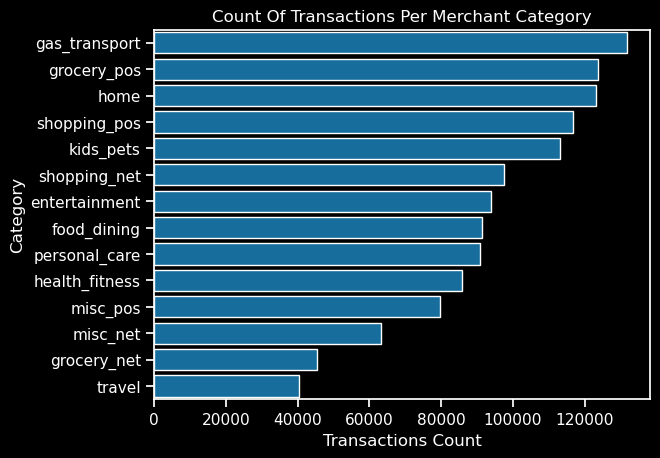

In [15]:
plot_title = 'Count Of Transactions Per Merchant Category'
plot_labels = ['Transactions Count', 'Category']
categories_order = df_transactions_clean['category'].value_counts(ascending=False).index
ax = sb.countplot(df_transactions_clean, y='category', order=categories_order, color=plt_mod.default_plot_color)
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Observations

> We can see that the gas transport category has the highest transactions with more than 120000 transactions and the travel category is the lowest with more than 40000 transactions.

### Question 2: What is the amount of money spent on the transactions?

> We will limit the plot x value from 1-500 because transactions that costs more 500 are very rare.

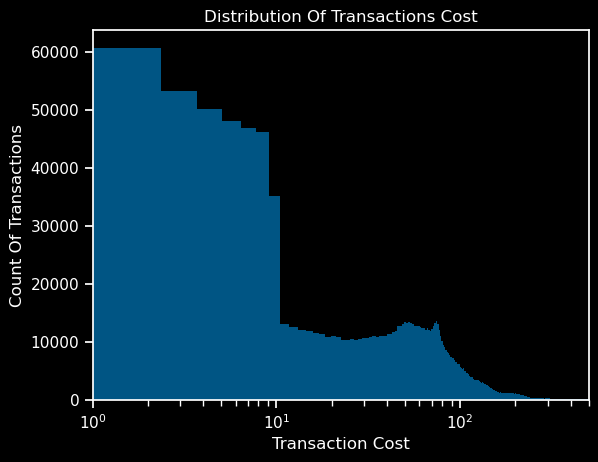

In [16]:
plot_title = 'Distribution Of Transactions Cost'
plot_labels = ['Transaction Cost', 'Count Of Transactions']
ax = sb.histplot(df_transactions_clean, x='amt', color=plt_mod.default_plot_color)
plt.xscale('log')
plt.xlim(1, 500);
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Observation

> We can see that most of the transactions costs from 1-10 and there are decent amount of transactions from 10-100.

### Question 3: What are the top 15 zip codes with the highest transactions count?

In [17]:
top_15_zip_codes = df_transactions_clean['zip'].value_counts(ascending=False)[:15]
zip_codes_labels = top_15_zip_codes.index.astype(str)
zip_codes_values = top_15_zip_codes.values

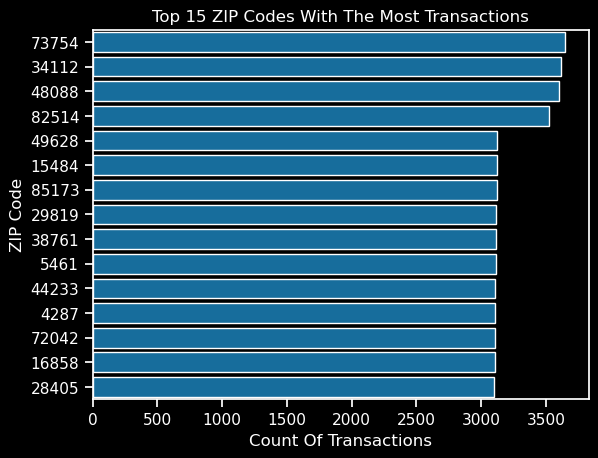

In [18]:
plot_title = 'Top 15 ZIP Codes With The Most Transactions'
plot_labels = ['Count Of Transactions', 'ZIP Code']
sb.barplot(x=zip_codes_values, y=zip_codes_labels, color=plt_mod.default_plot_color)
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Obversation

> We can see that the ZIP code with the most transactions count is 73754.

### Question 4: What are the top 15 jobs with the highest transactions count?

In [19]:
top_15_jobs = df_transactions_clean['job'].value_counts(ascending=False)[:15]
top_15_jobs_labels = top_15_jobs.index
top_15_jobs_values = top_15_jobs.values

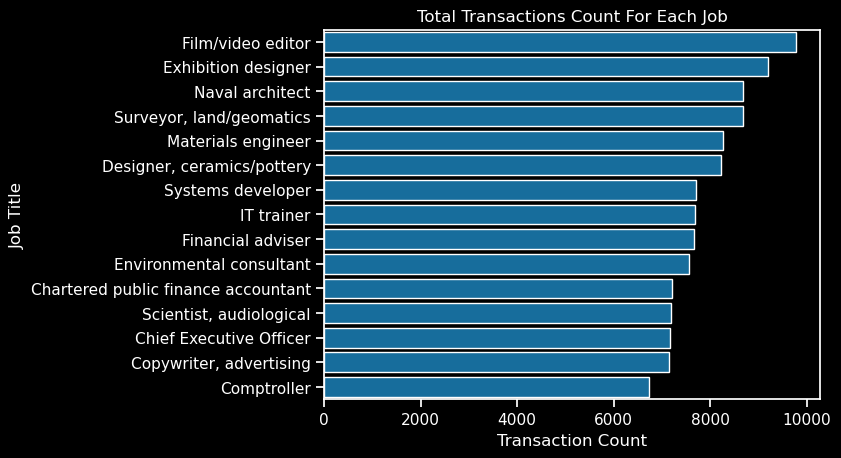

In [20]:
plot_title = 'Total Transactions Count For Each Job'
plot_labels = ['Transaction Count', 'Job Title']
sb.barplot(x=top_15_jobs_values, y=top_15_jobs_labels, color=plt_mod.default_plot_color)
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Obversation

> We can see that the job with highest trasnsactions count is Film/video editor.

### Question 5: What are the top 15 merchants with highest transactions?

In [21]:
top_15_merchants = df_transactions_clean['merchant'].value_counts(ascending=False)[:15]
top_15_merchants_labels = top_15_merchants.index
top_15_merchants_values = top_15_merchants.values

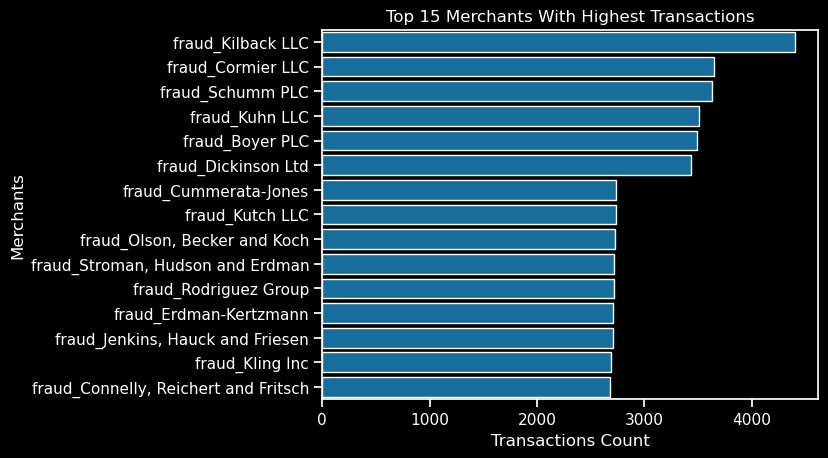

In [22]:
plot_title = 'Top 15 Merchants With Highest Transactions'
plot_labels = ['Transactions Count', 'Merchants']
sb.barplot(x=top_15_merchants_values, y=top_15_merchants_labels, color=plt_mod.default_plot_color)
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Obversation

> We can see that Kilback LLC has the highest transactions count.

### Question 6: Which month and day has the highest and lowest count of transactions?

In [23]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_transactions = df_transactions_clean['trans_datetime'].dt.month.value_counts().sort_index()
month_transactions_values = month_transactions.values
day_transactions = df_transactions_clean['trans_datetime'].dt.day.value_counts().sort_index()
day_transactions_labels = day_transactions.index.astype(str)
day_transactions_values = day_transactions.values

In [24]:
month_bar_colors = [plt_mod.default_plot_color] * month_transactions_values.size
day_bar_colors = [plt_mod.default_plot_color] * day_transactions_values.size

month_plot_hatch = ['' for _ in range(month_transactions_values.size)]
day_plot_hatch = ['' for _ in range(day_transactions_values.size)]

month_plot_hatch[month_transactions_values.argmax()] = '///'
day_plot_hatch[day_transactions_values.argmax()] = '///'
month_bar_colors[month_transactions_values.argmax()] = plt_mod.orange_plot_color
day_bar_colors[day_transactions_values.argmax()] = plt_mod.orange_plot_color

month_plot_hatch[month_transactions_values.argmin()] = 'oo'
day_plot_hatch[day_transactions_values.argmin()] = 'oo'
month_bar_colors[month_transactions_values.argmin()] = plt_mod.orange_plot_color
day_bar_colors[day_transactions_values.argmin()] = plt_mod.orange_plot_color

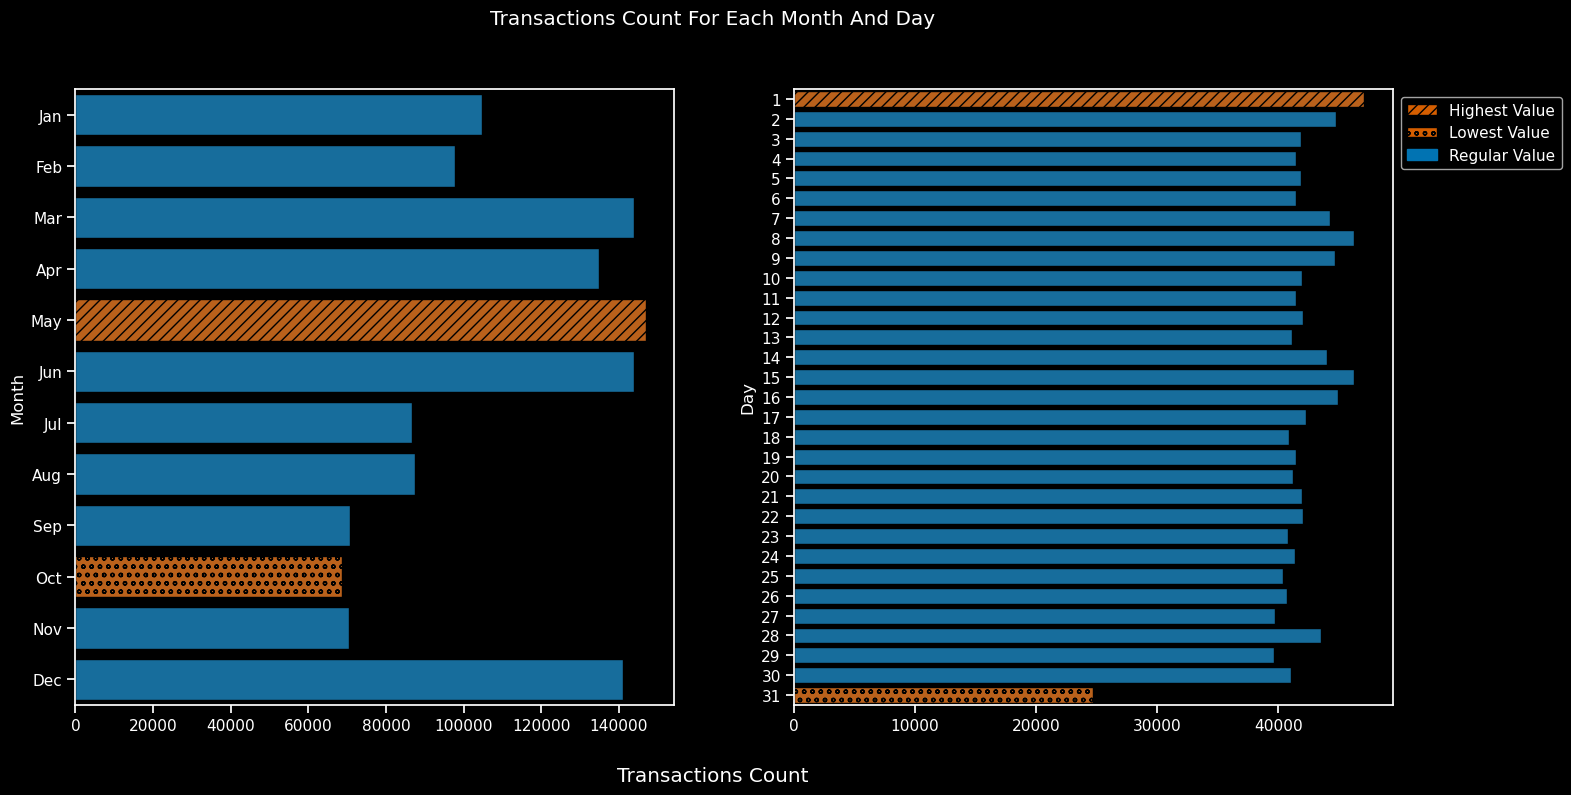

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
fig.suptitle('Transactions Count For Each Month And Day')
fig.supxlabel('Transactions Count')
sb.barplot(ax=ax[0], x=month_transactions_values, y=month_labels, palette=month_bar_colors, hatch=month_plot_hatch, edgecolor='black')
ax[0].set_ylabel('Month')
sb.barplot(ax=ax[1], x=day_transactions_values, y=day_transactions_labels, palette=day_bar_colors, hatch=day_plot_hatch, edgecolor='black');
ax[1].set_ylabel('Day')
highest_patch = mpatches.Patch(facecolor=plt_mod.orange_plot_color, edgecolor='black', hatch='///', label='Highest Value')
lowest_patch = mpatches.Patch(facecolor=plt_mod.orange_plot_color, edgecolor='black', hatch='oo', label='Lowest Value')
regular_patch = mpatches.Patch(facecolor=plt_mod.default_plot_color, edgecolor=plt_mod.default_plot_color, label='Regular Value')
plt.legend(handles=[highest_patch, lowest_patch, regular_patch], bbox_to_anchor=(1, 1));

#### Obversation

> We can see that the month May and day 1 has the highest transactions count and the month Oct and day 31 has the lowest transactions count.

### Question 7: What are the top 15 cities ans states with highest transactions count?

In [26]:
top_cities = df_transactions_clean['city'].value_counts(ascending=False)[:15]
top_states = df_transactions_clean['state'].value_counts(ascending=False)[:15]
top_cities_labels = top_cities.index
top_cities_values = top_cities.values
top_states_labels = top_states.index
top_states_values = top_states.values

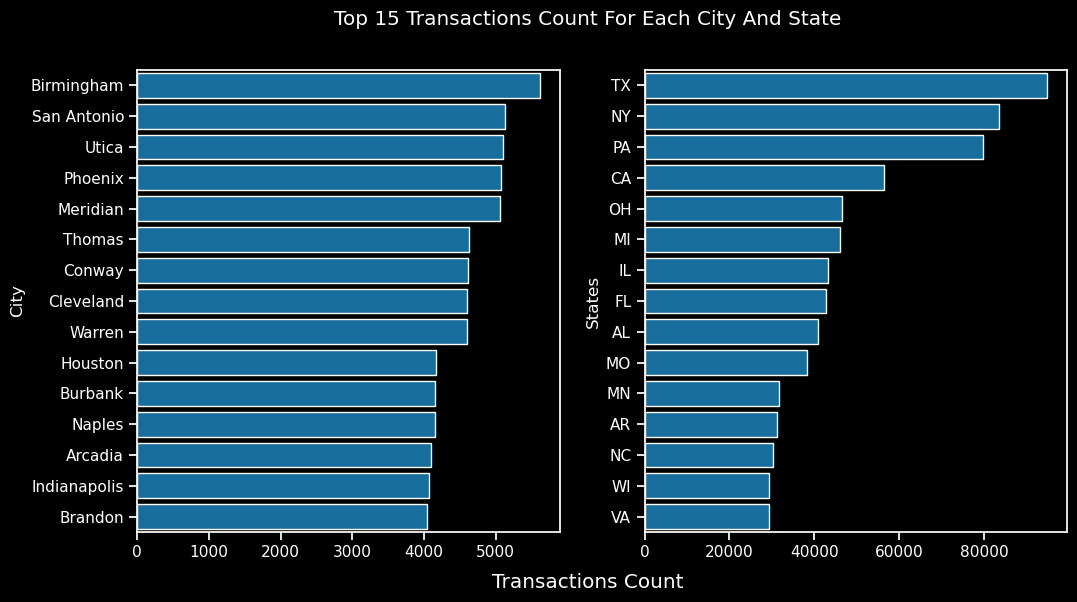

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Top 15 Transactions Count For Each City And State')
fig.supxlabel('Transactions Count')
sb.barplot(ax=ax[0], x=top_cities_values, y=top_cities_labels, color=plt_mod.default_plot_color)
ax[0].set_ylabel('City')
sb.barplot(ax=ax[1], x=top_states_values, y=top_states_labels, color=plt_mod.default_plot_color)
ax[1].set_ylabel('States');

#### Observation

> We can see that Birmingham city and Texas state has the highest transactions count.

## Bivariate Exploration <a id='bi_explore'></a>

### Question 1: Which category is associated with the highest count of frauds transactions?

In [28]:
category_fraud_count = df_transactions_clean.groupby('category')['is_fraud'].sum().sort_values(ascending=False)
category_labels = category_fraud_count.index

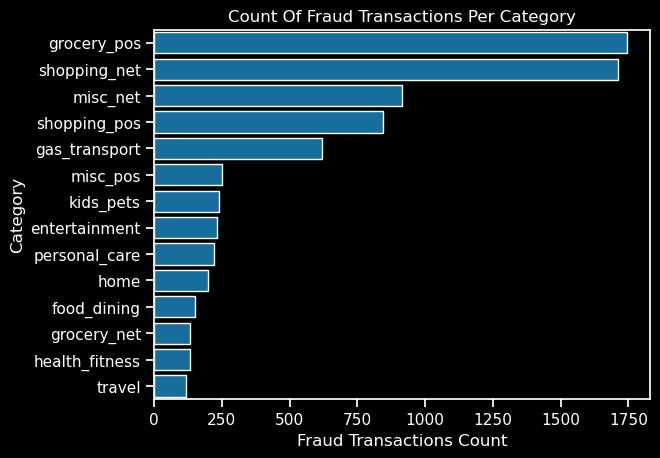

In [29]:
plot_title = 'Count Of Fraud Transactions Per Category'
plot_labels = ['Fraud Transactions Count', 'Category']
sb.barplot(x=category_fraud_count, y=category_labels, color=plt_mod.default_plot_color)
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Obversation

> We can see that the grocery point of sales has the highest frauds count.

### Question 2: Is a transaction from higher city population is associated with higher count of fraud transactions?

In [30]:
def CityPopCategories(x):
    if x < 10000:
        return 'Less Than 10000'
    elif (x > 10000) & (x < 50000):
        return 'More Than 10000'
    elif (x > 50000) & (x < 100000):
        return 'More Than 50000'
    elif (x > 100000) & (x < 500000):
        return 'More Than 100000'
    elif (x > 500000) & (x < 1000000):
        return 'More Than 500000'
    elif x > 1000000:
        return 'More Than 1000000'

In [31]:
plot_order = ['Less Than 10000', 'More Than 10000', 'More Than 50000', 'More Than 100000', 'More Than 500000', 'More Than 1000000']
df_transactions_clean['city_pop_category'] = df_transactions_clean['city_pop'].apply(CityPopCategories)
city_pop_category_fraud = df_transactions_clean.groupby('city_pop_category')['is_fraud'].sum()

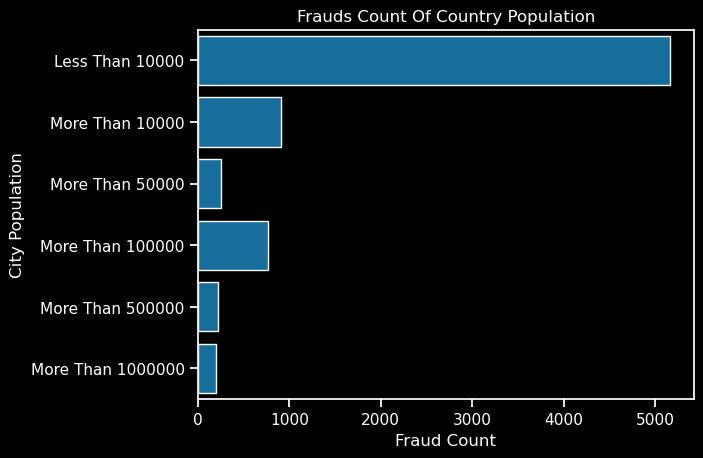

In [32]:
plot_title = 'Frauds Count Of Country Population'
plot_labels = ['Fraud Count', 'City Population']
sb.barplot(x=city_pop_category_fraud.values, y=city_pop_category_fraud.index, color=plt_mod.default_plot_color, order=plot_order)
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Obversation

> We can see that a higher city population is not associated with higher fraud count as a city population with less than 10000 has the highest frauds count.

### Question 3: What are the top 15 ZIP codes that has the highest fraud transactions?

In [33]:
zip_codes_fraud_grouped = df_transactions_clean.groupby('zip')['is_fraud'].sum().sort_values(ascending=False)[:15]
zip_codes_fraud_values = zip_codes_fraud_grouped.values
zip_codes_fraud_labels = zip_codes_fraud_grouped.index.astype(str)

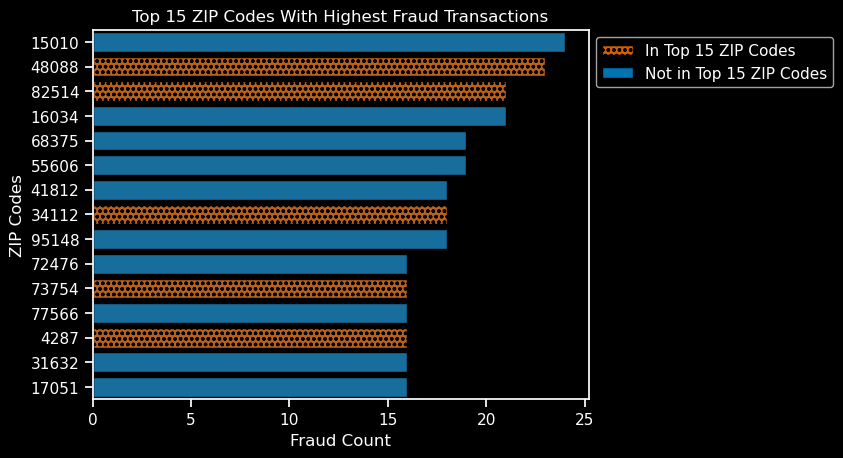

In [34]:
plot_title = 'Top 15 ZIP Codes With Highest Fraud Transactions'
plot_labels = ['Fraud Count', 'ZIP Codes']
plt_mod.SetupCompareBarPlot(zip_codes_fraud_values, zip_codes_fraud_labels, zip_codes_labels, ['Not in Top 15 ZIP Codes', 'In Top 15 ZIP Codes'])
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Obversation

> We can see that some ZIP codes with high transactions count has higher fraud transactions.

### Question 4: What job is associated with the highest fraud transactions?

In [35]:
top_job_fraud = df_transactions_clean.groupby('job')['is_fraud'].sum().sort_values(ascending=False)[:15]
top_job_fraud_labels = top_job_fraud.index
top_job_fraud_values = top_job_fraud.values

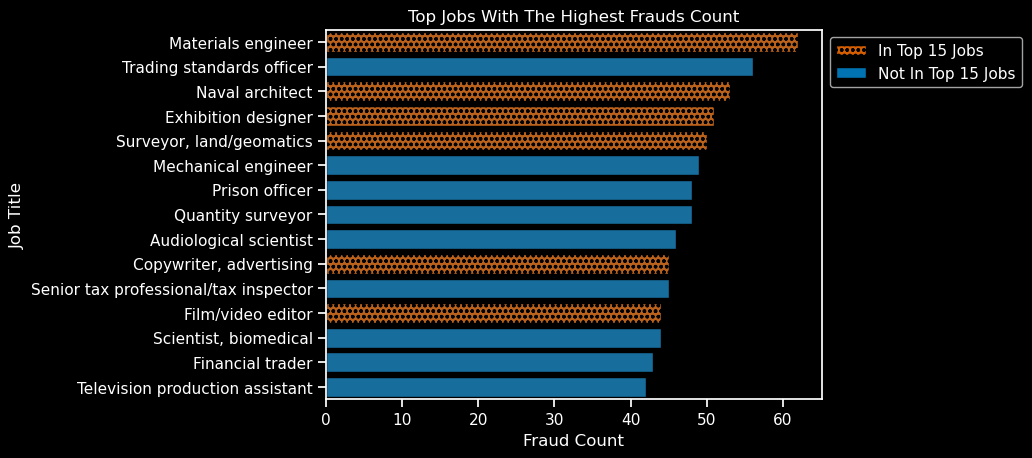

In [36]:
plot_title = 'Top Jobs With The Highest Frauds Count'
plot_labels = ['Fraud Count', 'Job Title']
plt_mod.SetupCompareBarPlot(top_job_fraud_values, top_job_fraud_labels, top_15_jobs_labels, ['Not In Top 15 Jobs', 'In Top 15 Jobs'])
plt_mod.InitAxesLabels(plot_title, plot_labels)

#### Obversation

> Similarly to ZIP codes we can see that some jobs with high transactions count has higher fraud transactions.

### Question 5: What are the top 15 cities and states with the highest frauds transactions count?

In [37]:
top_cities_fraud = df_transactions_clean.groupby('city')['is_fraud'].sum().sort_values(ascending=False)[:15]
top_states_fraud = df_transactions_clean.groupby('state')['is_fraud'].sum().sort_values(ascending=False)[:15]
top_cities_fraud_labels = top_cities_fraud.index
top_cities_fraud_values = top_cities_fraud.values
top_states_fraud_labels = top_states_fraud.index
top_states_fraud_values = top_states_fraud.values

In [38]:
cities_bar_colors = [plt_mod.default_plot_color] * top_cities_fraud_values.size
states_bar_colors = [plt_mod.default_plot_color] * top_states_fraud_values.size

cities_labels_in_top15 = top_cities_fraud_labels.isin(top_cities_labels)
states_labels_in_top15 = top_states_fraud_labels.isin(top_states_labels)
city_plot_hatch = ['' for _ in range(top_cities_fraud_values.size)]
state_plot_hatch = ['' for _ in range(top_states_fraud_values.size)]

for i in range(cities_labels_in_top15.size):
    if cities_labels_in_top15[i] == True:
        city_plot_hatch[i] = 'ooo'
        cities_bar_colors[i] = plt_mod.orange_plot_color
        
for i in range(states_labels_in_top15.size):
    if states_labels_in_top15[i] == True:
        state_plot_hatch[i] = 'ooo'
        states_bar_colors[i] = plt_mod.orange_plot_color

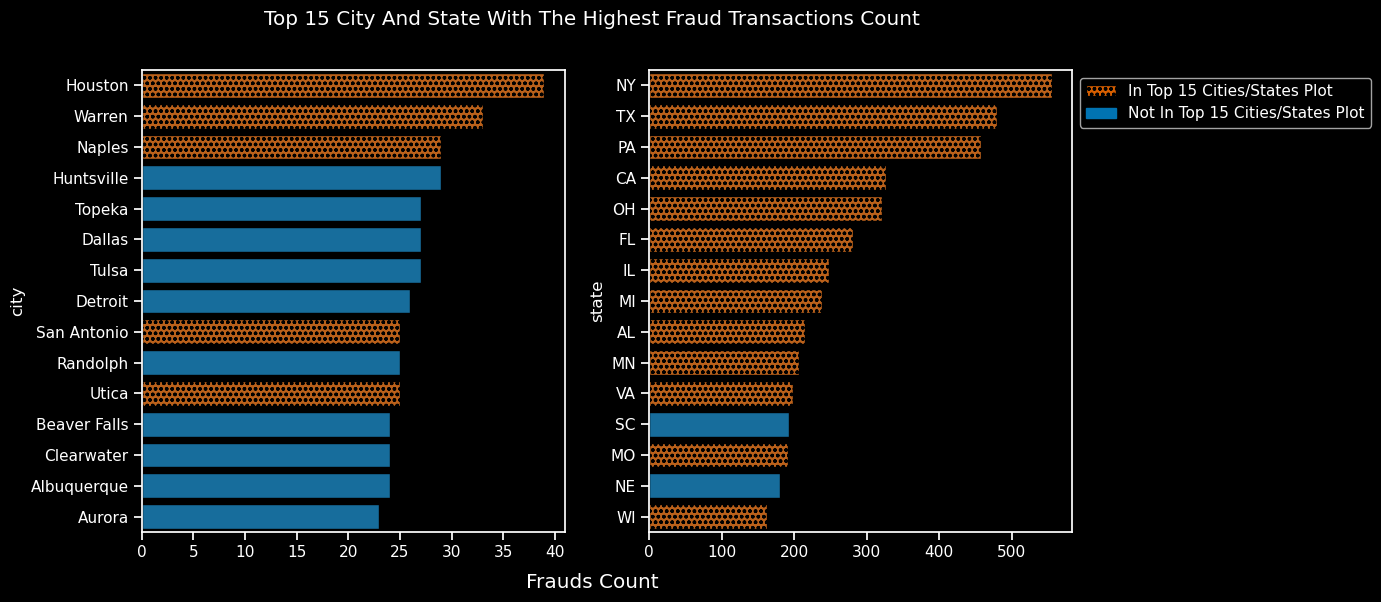

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Top 15 City And State With The Highest Fraud Transactions Count')
fig.supxlabel('Frauds Count')
sb.barplot(ax=ax[0], x=top_cities_fraud_values, y=top_cities_fraud_labels, palette=cities_bar_colors, hatch=city_plot_hatch, edgecolor='black')
sb.barplot(ax=ax[1], x=top_states_fraud_values, y=top_states_fraud_labels, palette=states_bar_colors, hatch=state_plot_hatch, edgecolor='black')

hatched_patch = mpatches.Patch(facecolor=plt_mod.orange_plot_color, edgecolor='black', hatch='ooo', label='In Top 15 Cities/States Plot')
regular_patch = mpatches.Patch(facecolor=plt_mod.default_plot_color, edgecolor=plt_mod.default_plot_color, label='Not In Top 15 Cities/States Plot')
plt.legend(handles=[hatched_patch, regular_patch], bbox_to_anchor=(1, 1));

#### Observation

> We can see that most of states with high transactions count has higher count of fraud transactions but for cities not most of cities with high transactions count has higher count of fraud transactions.

### Question 6: What are The Top 15 Merchants With The Highest Count Of Fraud Transactions?

In [40]:
top_merchants_fraud = df_transactions_clean.groupby('merchant')['is_fraud'].sum().sort_values(ascending=False)[:15]
top_merchants_fraud_labels = top_merchants_fraud.index
top_merchants_fraud_values = top_merchants_fraud.values

In [41]:
bar_colors = [plt_mod.default_plot_color] * top_merchants_fraud_values.size
merchant_labels_in_top15 = top_merchants_fraud_labels.isin(top_15_merchants_labels)
merchant_plot_hatch = ['' for _ in range(top_merchants_fraud_values.size)]

for i in range(merchant_labels_in_top15.size):
    if merchant_labels_in_top15[i] == True:
        merchant_plot_hatch[i] = 'ooo'
        bar_colors[i] = plt_mod.orange_plot_color

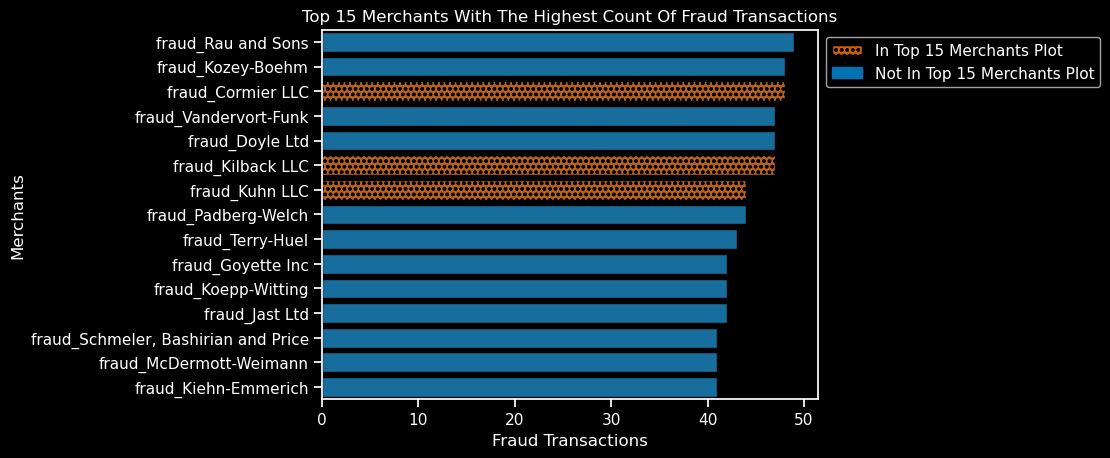

In [42]:
sb.barplot(x=top_merchants_fraud_values, y=top_merchants_fraud_labels, palette=bar_colors, hatch=merchant_plot_hatch, edgecolor='black')
plt.title('Top 15 Merchants With The Highest Count Of Fraud Transactions')
plt.xlabel('Fraud Transactions')
plt.ylabel('Merchants');

hatched_patch = mpatches.Patch(facecolor=plt_mod.orange_plot_color, edgecolor='black', hatch='ooo', label='In Top 15 Merchants Plot')
regular_patch = mpatches.Patch(facecolor=plt_mod.default_plot_color, edgecolor=plt_mod.default_plot_color, label='Not In Top 15 Merchants Plot')
plt.legend(handles=[hatched_patch, regular_patch], bbox_to_anchor=(1, 1));

#### Observation

> We can see that most of merchants with the highest transactions count are not associated with the highest count of fraud transactions.

### Question 7: Which Month And Day Has The Highest And Lowsest Count Of Fraud Transactions?

In [43]:
fraud_transactions = df_transactions_clean[df_transactions_clean['is_fraud']]
month_fraud_transactions = fraud_transactions.groupby(fraud_transactions['trans_datetime'].dt.month).size()
day_fraud_transactions = fraud_transactions.groupby(fraud_transactions['trans_datetime'].dt.day).size()
month_fraud_transactions_values = month_fraud_transactions.values
day_fraud_transactions_labels = day_fraud_transactions.index.astype(str)
day_fraud_transactions_values = day_fraud_transactions.values

In [44]:
month_bar_colors = [plt_mod.default_plot_color] * month_fraud_transactions_values.size
day_bar_colors = [plt_mod.default_plot_color] * day_fraud_transactions_values.size

month_fraud_plot_hatch = ['' for _ in range(month_fraud_transactions_values.size)]
day_fraud_plot_hatch = ['' for _ in range(day_fraud_transactions_values.size)]

month_fraud_plot_hatch[month_fraud_transactions_values.argmax()] = '///'
day_fraud_plot_hatch[day_fraud_transactions_values.argmax()] = '///'
month_bar_colors[month_fraud_transactions_values.argmax()] = plt_mod.orange_plot_color
day_bar_colors[day_fraud_transactions_values.argmax()] = plt_mod.orange_plot_color

month_fraud_plot_hatch[month_fraud_transactions_values.argmin()] = 'ooo'
day_fraud_plot_hatch[day_fraud_transactions_values.argmin()] = 'ooo'
month_bar_colors[month_fraud_transactions_values.argmin()] = plt_mod.orange_plot_color
day_bar_colors[day_fraud_transactions_values.argmin()] = plt_mod.orange_plot_color

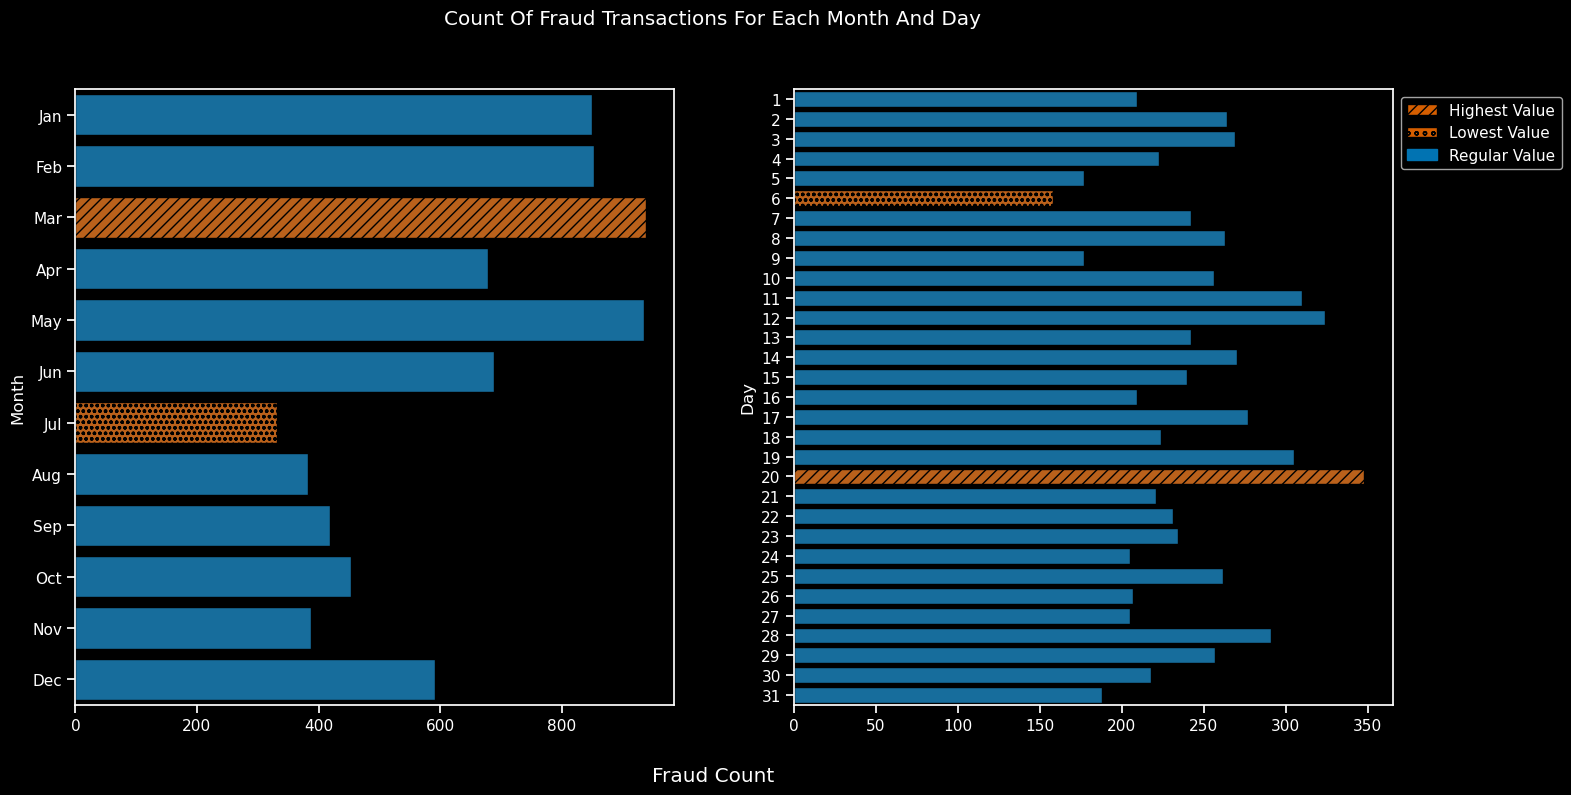

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
fig.suptitle('Count Of Fraud Transactions For Each Month And Day')
fig.supxlabel('Fraud Count')
sb.barplot(ax=ax[0], x=month_fraud_transactions_values, y=month_labels, palette=month_bar_colors, hatch=month_fraud_plot_hatch, edgecolor='black')
ax[0].set_ylabel('Month')
sb.barplot(ax=ax[1], x=day_fraud_transactions_values, y=day_fraud_transactions_labels, palette=day_bar_colors, hatch=day_fraud_plot_hatch, edgecolor='black');
ax[1].set_ylabel('Day')

highest_patch = mpatches.Patch(facecolor=plt_mod.orange_plot_color, edgecolor='black', hatch='///', label='Highest Value')
lowest_patch = mpatches.Patch(facecolor=plt_mod.orange_plot_color, edgecolor='black', hatch='oo', label='Lowest Value')
regular_patch = mpatches.Patch(facecolor=plt_mod.default_plot_color, edgecolor=plt_mod.default_plot_color, label='Regular Value')
plt.legend(handles=[highest_patch, lowest_patch, regular_patch], bbox_to_anchor=(1, 1));

#### Observation

> We can see that Mar and Day 20 has the highest count of fraud transactions and Jul and Day 6 has the lowest count of fraud transactions.

### Question 8: What Transactions Cost Range Has the Highest Precentage Of Fraud Transactions?

> In this plot we have zoomed out from 500 to 2000.

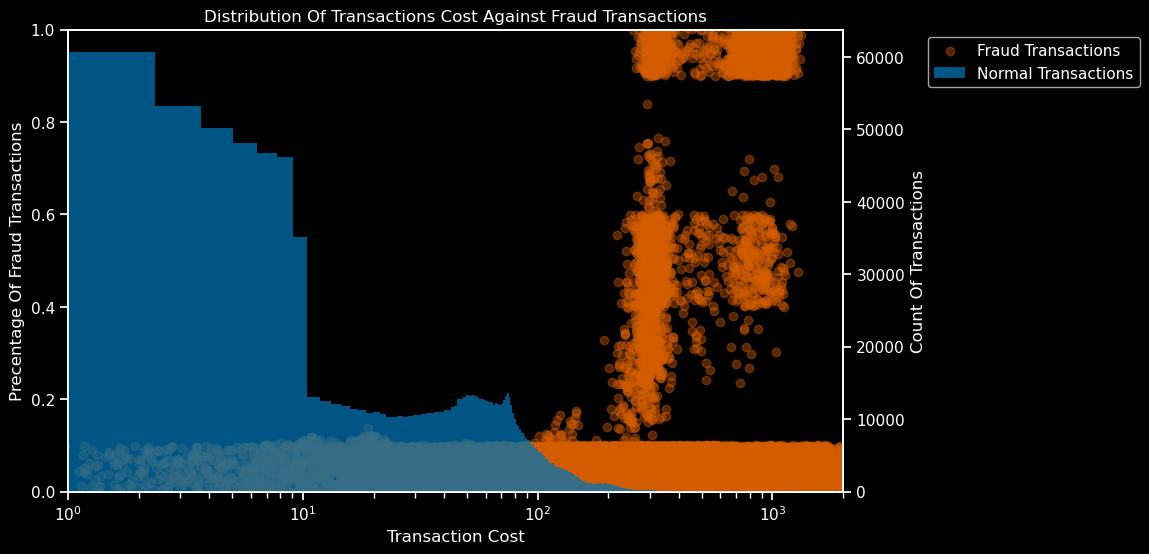

In [46]:
fraud_frequency = df_transactions_clean.groupby('amt')['is_fraud'].mean()
fig, ax1 = plt.subplots(figsize=(10, 6))
sb.regplot(ax=ax1, x=fraud_frequency.index, y=fraud_frequency.values, scatter_kws={'alpha': 0.4}, x_jitter=0.2, y_jitter=0.1, color=plt_mod.orange_plot_color, fit_reg=False)
ax1.set_xlabel('Transaction Cost')
ax1.set_ylabel('Precentage Of Fraud Transactions')
ax1.set_ylim(0, 1)
ax2 = ax1.twinx()
sb.histplot(ax=ax2, data=df_transactions_clean, x='amt', color=plt_mod.default_plot_color)
plt.xscale('log')
plt.xlim(1, 2000);
plt.title('Distribution Of Transactions Cost Against Fraud Transactions')
ax2.set_ylabel('Count Of Transactions')
plt.legend(handles=[ax1.collections[0], ax2.patches[0]], labels=['Fraud Transactions', 'Normal Transactions'], loc='upper left', bbox_to_anchor=(1.1, 1));

#### Observation

> We can see that transactions that costs from 200-1000 has the highest precentage of fraud transactions.

## Multivariate Exploration <a id='multi_explore'></a>

### Question: What Is The Difference Between Fraud And Normal Transactions For Each Category?

> In this plot we have zoomed out from 2000 to 10000.

In [47]:
fraud_transactions = df_transactions_clean[df_transactions_clean['is_fraud']]

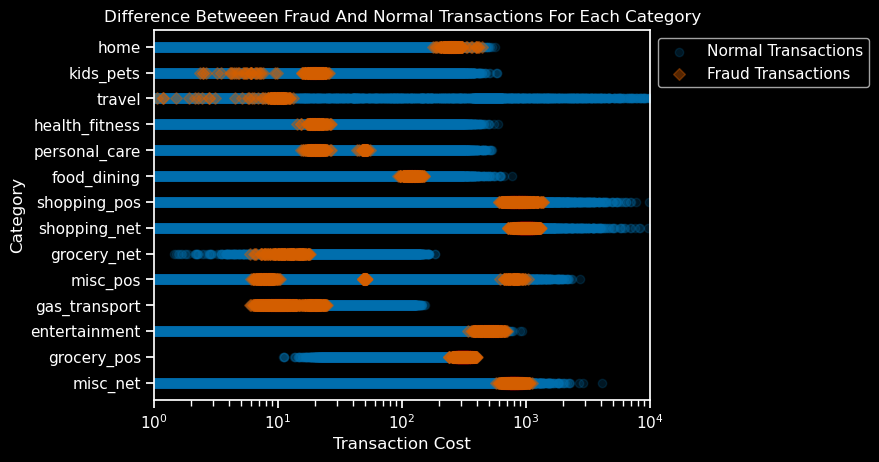

In [48]:
plot_title = 'Difference Betweeen Fraud And Normal Transactions For Each Category'
plot_labels = ['Transaction Cost', 'Category']
sb.regplot(data=df_transactions_clean, x='amt', y='category', scatter_kws={'alpha': 0.2}, fit_reg=False, color=plt_mod.default_plot_color, label='Normal Transactions')
sb.regplot(data=fraud_transactions, x='amt', y='category', scatter_kws={'alpha': 0.4}, fit_reg=False, color=plt_mod.orange_plot_color, marker='D', label='Fraud Transactions')
plt.xscale('log')
plt.xlim(1, 10000)
plt_mod.InitAxesLabels(plot_title, plot_labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

#### Observation

> We can see that travel has the lowest fraud transactions count/cost while shopping point of sale has the has the highest fraud transactions cost.

## Conclusions <a id='conclusions'></a>

> 1. `gas_transport` merchant category has the highest transactions count.
2. Most of transactions cost ranges from 1-10 and there are decent amount of transactions from 10-100.
3. The ZIP code with the highest count of transactions is **73754**.
4. The job with the highest count of transactions is Film/video editor.
5. The merchant with the highest count of transactions is **Kilback LLC**.
6. The month and day with the highest count of transactions is May and Day 1 and the month and day with the lowest count of transactions is Oct and Day 31.
7. The city and state with the highest count of transactions is Birmingham and Texas.
8. The marchant category with the highest count of fraud is grocery point of sales.
9. Cities with low count of population has higher fraud transactions.
10. Some ZIP codes with higher count of transactions has higher count of fraud.
11. Some jobs with higher count of transactions has higher count of fraud.
12. Most states with higher count of transactions has higher count of fraud but for cities only some of them with higher count of transactions has higher count of fraud.
13. Some merchants with higher count of transactions has higher count of fraud.
14. The month and day with the highest count of fraud transactions is Mar and Day 20 and the month and day with the least count of fraud transactions is Jul and Day 6.
15. Transactions with cost that ranges from 200-1000 has the highest count of fraud transactions.
16. The travel category has the lowest fraud transactions count/cost while shopping point of sale has the has the highest fraud transactions cost.

## References <a id='references'></a>

> Kaggle: https://www.kaggle.com  
Fraud Detection Dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection  
Visual Studio Code: https://code.visualstudio.com  
Stack Overflow: https://stackoverflow.com  
Matplotlib: https://matplotlib.org/stable/index.html  
Matplotlib Dark Theme: https://matplotlib.org/stable/gallery/style_sheets/dark_background.html
Seaborn: https://seaborn.pydata.org/  
Jupyter: https://jupyter.org/